# Week 4 - Coding Exercise
This notebook **is the deliverable** for your weekly coding exercises. Below you will find the text of the exercise and the space to write your code. Feel free to **add additional code cells** if needed. 

## Completion Instructions
1. You are allowed to add additional **cells**. 
1. Unless specified otherwise, you can use as many **intermediate steps** as you want to get to the final result of each point. We will only mark the final result.
1. Some exercises will ask you to perform a calculation and assign the result to a variable with a **specific name**. Assigning the result to a variable with the wrong name will result in **0 marks** for that point.
1. Some exercises will ask you to perform a calculation and assign the result to a variable of a **specific type** (number, Series, DataFrame, etc.). Assigning the result to a variable of the wrong type will result in **0 marks** for that point. You can check the type of an object with the function **[`type()`](https://www.codingem.com/type-of-in-python/)**.
1. The **final result** of each point should be **shown on screen**. For example if you are asked to assign the result of a calculation to a number called `Total`, this number should be visible on screen. If the result is a DataFrame or Series you should show only a few rows with **[`df.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)** or, if more appropriate, **[`df.tail()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html)**. If a final result is not shown on screen, it will lead to **0 marks** for that point.
1. You should not "hard-code" numbers into your calculations if this can be avoided. For example if you need to use the "number of columns" in a DataFrame in a calculation, you should use a command/function to calculate the number of columns and not simply count the columns and use `7` (a hard-coded number) in your calculations. Using hard-coded numbers when this is unnecessary may result in **0 marks** for that point. 


## Submission Instructions
1. Do not change the **name of the file**. Canvas will automatically add your name and student ID to the file.
1. Before submitting the notebook please **check that it runs properly** from top to bottom. To do this, save the file, close it, than re-open it and press the fast-forward button at the top of the notebook or _Restart and Run All Cells_ from the _Kernel_ menu. You can see a discussion of this in this [video](https://youtu.be/P0NyuTGddPo). If your file has a breaking error that does not allow us to run the notebook from top to bottom you will receive a **penalty of 5 marks**. 
___

#### Identification
Please enter your **name** and your **student ID** number in this markdown cell:

* **Student Name:** XXXXXX
* **Student ID:** XXXXXX

Missing name or ID will result in **1 mark penalty**.

___
#### Import Statements
Add in the following cell all the import statements that you need to run the entire notebook. Import statements anywhere else in the notebook will result in a **penalty of 1 mark**.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 3
%matplotlib inline

___
### Exercise CE4.01
The pandemic, geo-political instability, and rising inflation have had a significant effect on the price of copper in recent years. The file `CE4_Copper.csv` contains data on the daily price of one pound of copper from 1970. Load its content into a DataFrame called `copper`. Choose the appropriate index for this DataFrame and be sure that the column with the dates is properly recognized by Pandas as dates value (as a datetime object) **[Point 1: 1 Mark]**.

In [6]:
# Do not explicitly set index in order to allow subsequent questions to be solved more elegantly.
# Allow pandas to add its own index at the time the csv file is read.
copper = pd.read_csv('CE4_Copper.csv', parse_dates=['Date']).dropna() 
copper.head()

,Date,Price
0,1970-01-05,0.7180
1,1970-01-06,0.7140
2,1970-01-07,0.7115
3,1970-01-08,0.7095
4,1970-01-09,0.7175


Add to the DataFrame `copper` the following three columns **[Point 2: 1 Mark]**:
- `Long` defined as the 252 days moving average of the price
- `Short` as the 126 days moving average of the price
- `Signal` as the buy/sell signal defined as the sign of `Short` minus `Long`. Signal should be equal to `+1` if `Short` is higher than `Long` and `-1` if it is lower (and `0` if they are equal).

In [8]:
copper['Long'] = copper['Price'].rolling(252).mean()
copper['Short'] = copper['Price'].rolling(126).mean()
copper['Signal'] = np.sign(copper['Short'] - copper['Long'])
copper.tail()

,Date,Price,Long,Short,Signal
13383,2023-05-11,3.7008,3.804804,3.970375,1.0
13384,2023-05-12,3.7248,3.802502,3.970705,1.0
13385,2023-05-15,3.7440,3.800476,3.971505,1.0
13386,2023-05-16,3.6624,3.798109,3.972140,1.0
13387,2023-05-17,3.7504,3.795902,3.973168,1.0


Your boss knows that taking a short position in copper can be very expensive. He asks you to create a vertical bar plot that shows, for every calendar year, how many days of short positions (`signal = -1`) there are. The Graph should have
* Size of 12x6
* Title _"Number of Short Positions"_

**[Point 3: 1 Mark]**.

<AxesSubplot:title={'center':'Number of Short Positions'}, xlabel='Date'>

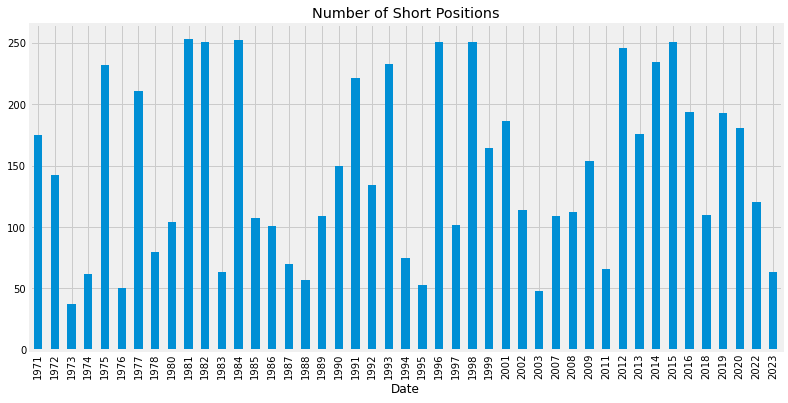

In [10]:
short_only = copper[copper['Signal'] == -1.0]
short_only_count_by_year = short_only.groupby(short_only['Date'].dt.year)['Signal'].count()
short_only_count_by_year.plot(kind='bar',
                       figsize=(12,6),
                       title='Number of Short Positions')


# ___
### Exercise CE4.02
The file `CE4_USmarket.csv` contains data on the value of the S&P 500. Your boss is interested to know whether a momentum trading strategy works better using a short-term signal (63 days) or a long-term signal (252 days). 

Load the content of this file into a DataFrame called `us_market`. Choose the appropriate index for this DataFrame and be sure that the column with the dates is properly recognized by Pandas as date values. **[Point 4: 1 Mark]**

In [12]:
# Do not explicitly set index in order to allow subsequent questions to be solved more elegantly.
# Allow pandas to add its own index at the time the csv file is read.
us_market = pd.read_csv('CE4_USmarket.csv', parse_dates=['Date']).dropna()
us_market.head()

,Date,S&P500
0,1990-01-01,353.40
1,1990-01-02,359.69
2,1990-01-03,358.76
3,1990-01-04,355.67
4,1990-01-05,352.20


To test whether a short-term or long-term momentum strategy would work best, add two new columns to `us_market` called `signal_63` equal to `+1` if the change of the stock price over the previous 63 days is positive and `0` otherwise (for legal reasons your company cannot short-sell shares), and `signal_252` equal to `+1` if the change in stock price over the previous 252 days is positive (and `0` otherwise). 

At the end of the calculation `us_market` should have three columns (the original one with the prices and `signal_63` and `signal_252`) **[Point 5: 1 Mark]**.

In [14]:
us_market['signal_63'] = np.where((np.log(us_market['S&P500'] / us_market['S&P500'].shift(63))) > 0, 1, 0)
us_market['signal_252'] = np.where((np.log(us_market['S&P500'] / us_market['S&P500'].shift(252))) > 0, 1, 0)
us_market.tail()

,Date,S&P500,signal_63,signal_252
8605,2022-12-26,3844.82,1,0
8606,2022-12-27,3829.25,1,0
8607,2022-12-28,3783.22,1,0
8608,2022-12-29,3849.28,1,0
8609,2022-12-30,3839.50,1,0


Add a new column to `us_market` called `fut_return` equal to the (logarithmic) return of the next trading day:

$$ r_{t, t+1} = \log \left(\frac{P_{t+1}}{P_{t}}\right)$$

Add another two columns to the DataFrame (called `performance_63` and `performance_252`, respectively) that are equal to the next day return if we hold a long position on the index that day according to each trading signal (and zero otherwise) **[Point 6: 1 Mark]**.

In [16]:
us_market['fut_return'] = np.log(us_market['S&P500'].shift(-1) / us_market['S&P500'])
us_market['performance_63'] = us_market['signal_63'] * us_market['fut_return']
us_market['performance_252'] = us_market['fut_return'] * us_market['signal_252']
us_market.tail()

,Date,S&P500,signal_63,signal_252,fut_return,performance_63,performance_252
8605,2022-12-26,3844.82,1,0,-0.004058,-0.004058,-0.0
8606,2022-12-27,3829.25,1,0,-0.012093,-0.012093,-0.0
8607,2022-12-28,3783.22,1,0,0.017311,0.017311,0.0
8608,2022-12-29,3849.28,1,0,-0.002544,-0.002544,-0.0
8609,2022-12-30,3839.50,1,0,NaN,NaN,NaN


Calculate the total performance of the two momentum strategies in every calendar year. Remember that, since we are using logarithmic returns, the total return is simply the sum of the daily returns (no compounding needed...). Once you have a DataFrame with, for every calendar year, the total return of the two momentum strategies, calculate and show on screen, the average annual return, and the standard deviations of the annual returns for the two strategies **[Point 7: 1 Mark]**.

In [59]:
# Total performance of two momentum strategies in each calendar year dataframe.
us_market_performance_by_year = us_market.groupby(us_market['Date'].dt.year)[['performance_63', 'performance_252']].sum()
us_market_performance_by_year.tail()

,performance_63,performance_252
Date,,
2018,-0.015866,-0.018314
2019,0.117051,0.131236
2020,0.140505,0.002697
2021,0.199673,0.244526
2022,-0.214016,-0.210339


In [19]:
# Average annual return performance of two momentum strategies.
us_market_performance_by_year[['performance_63', 'performance_252']].mean()

performance_63     0.039436
performance_252    0.070765
dtype: float64

In [20]:
# Standard deviation of annual return performance of two momentum strategies.
us_market_performance_by_year[['performance_63', 'performance_252']].std()

performance_63     0.121989
performance_252    0.122079
dtype: float64

___
### Exercise CE4.03
The file `CE4_Returns.csv` contains data on daily returns of five major developed stock markets from 1985 to the end of 2022. Load its content into a DataFrame called `returns`. Choose the appropriate index for this DataFrame and parse the date variable. 

In [61]:
# Do not explicitly set index in order to allow subsequent questions to be solved more elegantly.
# Allow pandas to add its own index at the time the csv file is read
returns = pd.read_csv('CE4_Returns.csv', parse_dates=['Date']).dropna()
returns.head()

,Date,Australia,Germany,Japan,UK,USA
0,1985-01-01,0.000000,0.011867,0.00000,-0.009950,-0.011245
1,1985-01-02,-0.011432,-0.008098,0.00000,-0.011459,-0.004849
2,1985-01-03,0.006134,0.000728,0.00389,0.007023,-0.005423
3,1985-01-04,0.009300,0.009295,0.00012,0.011786,0.003415
4,1985-01-07,0.012411,0.010993,0.00598,0.011729,-0.001523


Your boss has recently fallen in love with an investment strategy known as ["Sell in May and Go Away"](https://www.investopedia.com/terms/s/sell-in-may-and-go-away.asp). 

According to this very simplistic strategy, we should **invest between November and April** and don't invest between May and October. Add a column `Month` to the DataFrame `returns` with the calendar month of each observation. For every row, in this column, you should have a number from 1 to 12 indicating to which calendar month that observation belongs. Add a second column called `Signal` that is equal to `Long Position` if the month is between November and April (included) and `Zero Position` otherwise **[Point 8: 1 Mark]**.

In [103]:
returns['Month'] = returns['Date'].dt.month
returns['Signal'] = np.where((returns['Month'] >= 11) | (returns['Month'] <= 4), 'Long Position', 'Zero Position')
returns.tail(3000)

,Date,Australia,Germany,Japan,UK,USA,Month,Signal
6913,2011-07-01,0.004671,0.003165,0.011933,0.004627,0.000000,7,Zero Position
6914,2011-07-04,0.001418,-0.000473,0.001238,0.001078,-0.001337,7,Zero Position
6915,2011-07-05,-0.003056,-0.001110,0.009582,-0.003510,0.001009,7,Zero Position
6916,2011-07-06,0.007731,0.005402,-0.003475,0.008564,0.010392,7,Zero Position
6917,2011-07-07,-0.010092,-0.009239,0.004425,-0.010622,-0.006986,7,Zero Position
...,...,...,...,...,...,...,...,...
9908,2022-12-23,0.000000,0.000000,0.002410,0.000000,0.000000,12,Long Position
9909,2022-12-26,0.000000,0.003878,0.004002,0.000000,-0.004058,12,Long Position
9910,2022-12-27,0.003149,-0.004978,-0.000592,0.003230,-0.012093,12,Long Position
9911,2022-12-28,0.002645,0.010438,-0.007229,0.002069,0.017311,12,Long Position


To see whether the strategy works in these markets, use the **groupby operator** to calculate the (annualized) mean return for the five markets when the signal is equal to `Long Position` (we should invest) and when the signal is equal to `No Position` (we should not invest). The final result should be a DataFrame called `strategy_ret` **[Point 9: 1 Mark]** with:
- Two rows indexed with the signal name (`Long Position` and `No Position`)
- Five columns (one for each market)
- Each cell should not be annualized since every signal of this strategy only allows us to invest for 6 months every year. We can compare based on daily returns.

In [134]:
strategy_ret = returns.groupby(returns['Signal'])[['Australia', 'Germany', 'Japan', 'UK', 'USA']].mean()
strategy_ret

,Australia,Germany,Japan,UK,USA
Signal,,,,,
Long Position,0.000454,0.000567,0.000351,0.000411,0.000502
Zero Position,-0.000060,0.000008,-0.000200,-0.000045,0.000133


Repeat the above analysis assuming that you sold in May, but reinvested in August rather than November. The results should be a DataFrame called `strategy_ret2` with the same format as for Point 9 above, but with the modified investment strategy (investing between August and April and not investing between May and July). Recall there is no need to annualize these results **[Point 10: 1 Mark]**

In [142]:
returns['Signal2'] = np.where((returns['Month'] >= 8) | (returns['Month'] <= 4), 'Long Position', 'Zero Position')
strategy_ret2 = returns.groupby(returns['Signal2'])[['Australia', 'Germany', 'Japan', 'UK', 'USA']].mean()
strategy_ret2

,Australia,Germany,Japan,UK,USA
Signal2,,,,,
Long Position,0.000245,0.000282,0.000106,0.000223,0.000314
Zero Position,0.000046,0.000296,-0.000023,0.000057,0.000322
